# Description:

    Investigate rhizobiome composition at the different taxonomic levels 



# Init

In [1]:
%load_ext rpy2.ipython

In [143]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(grid)
library(gridExtra)
library(dplyr)
library(tidyr)

# Loading/editting OTU table

In [3]:
%%R
physeq.r = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r'
physeq.Full = readRDS(physeq.r)
physeq.Full


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


# Taxa distribution

In [7]:
%%R
colnames(tax_table(physeq.Full)) = c("Kingdom" ,"Phylum"  ,"Class",   "Order",   "Family",  "Genus" ,  "Species", "Rank8")

In [10]:
%%R
Family <- tax_glom(physeq.Full, taxrank="Family")


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 284 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 284 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 284 tips and 283 internal nodes ]


In [58]:
%%R
levels(sample_data(Family)$Plant) = c("BARE", "75-062", "B73", "H99" , "Hp301",  "Il14H",  "Ki3",  "B97" , "Tx303",  
                        "Mo18",   "MS71" ,  "Oh7B",  "ECHCG",  "ELCOR", "ERATE" , "SETFA",  "SORBI",  "SORSUD", 
                   "ABUTH", "AMAPO", "FAGES", "HELAN" ,  "GLYMA")

In [79]:
%%R

m.Fam = merge_samples(Family, "Plant")
m.Fam

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 284 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 284 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 284 tips and 283 internal nodes ]


In [80]:
%%R
#transform to sample count to rel abund
m.Fam = transform_sample_counts(m.Fam, function(x) x / sum(x))
sample_sums(m.Fam)

  BARE 75-062    B73    H99  Hp301  Il14H    Ki3    B97  Tx303   Mo18   MS71 
     1      1      1      1      1      1      1      1      1      1      1 
  Oh7B  ECHCG  ELCOR  ERATE  SETFA  SORBI SORSUD  ABUTH  AMAPO  FAGES  HELAN 
     1      1      1      1      1      1      1      1      1      1      1 
 GLYMA 
     1 


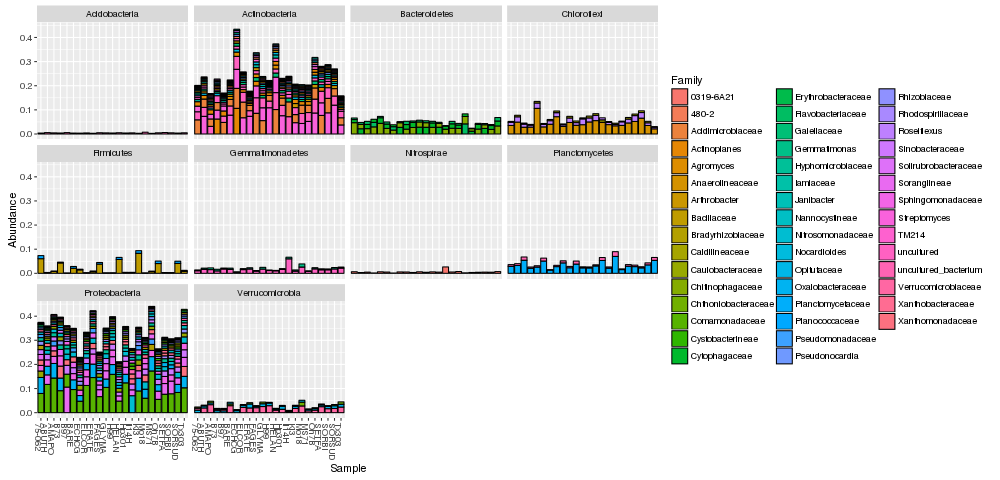

In [97]:
%%R -w 1000
#subset to top 20 OTUs
TopOTUs = names(sort(taxa_sums(m.Fam), TRUE)[1:50])
    Top = prune_taxa(TopOTUs, m.Fam)
p1 = plot_bar(Top,  fill="Family") +
    facet_wrap(~Phylum)

#pdf("firmicutes_relabund.pdf")
p1
#dev.off()

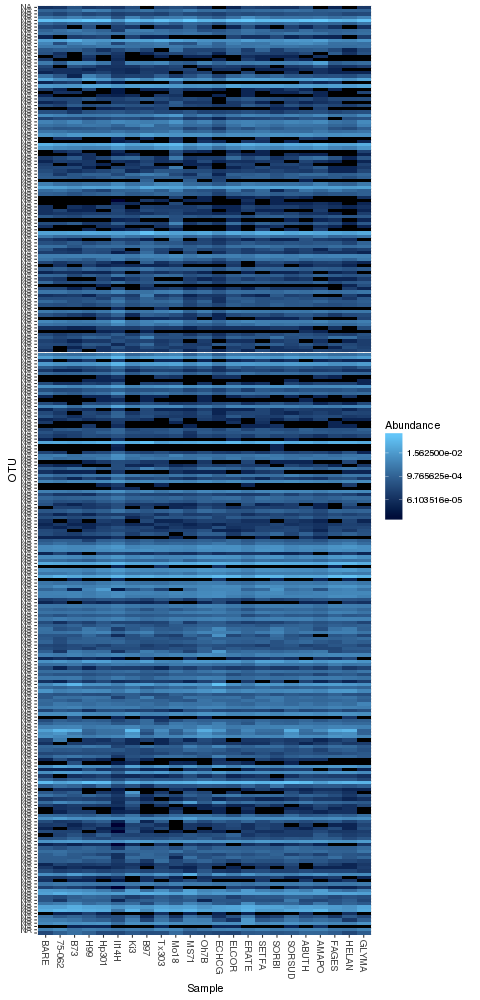

In [151]:
%%R -h 1000
SO = c("BARE", "75-062", "B73", "H99" , "Hp301",  "Il14H",  "Ki3",  "B97" , "Tx303",  
                        "Mo18",   "MS71" ,  "Oh7B",  "ECHCG",  "ELCOR", "ERATE" , "SETFA",  "SORBI",  "SORSUD", 
                   "ABUTH", "AMAPO", "FAGES", "HELAN" ,  "GLYMA")
plot_heatmap(m.Fam, taxa.label = "Family", sample.order = SO)

# merge taxa at the genus level

In [98]:
%%R
Genus <- tax_glom(physeq.Full, taxrank="Genus")


In [99]:
%%R
levels(sample_data(Genus)$Plant) = c("BARE", "75-062", "B73", "H99" , "Hp301",  "Il14H",  "Ki3",  "B97" , "Tx303",  
                        "Mo18",   "MS71" ,  "Oh7B",  "ECHCG",  "ELCOR", "ERATE" , "SETFA",  "SORBI",  "SORSUD", 
                   "ABUTH", "AMAPO", "FAGES", "HELAN" ,  "GLYMA")

In [100]:
%%R

m.Gen = merge_samples(Genus, "Plant")
m.Gen

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 366 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 366 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 366 tips and 365 internal nodes ]


In [101]:
%%R
#transform to sample count to rel abund
m.Gen = transform_sample_counts(m.Gen, function(x) x / sum(x))
sample_sums(m.Gen)

  BARE 75-062    B73    H99  Hp301  Il14H    Ki3    B97  Tx303   Mo18   MS71 
     1      1      1      1      1      1      1      1      1      1      1 
  Oh7B  ECHCG  ELCOR  ERATE  SETFA  SORBI SORSUD  ABUTH  AMAPO  FAGES  HELAN 
     1      1      1      1      1      1      1      1      1      1      1 
 GLYMA 
     1 


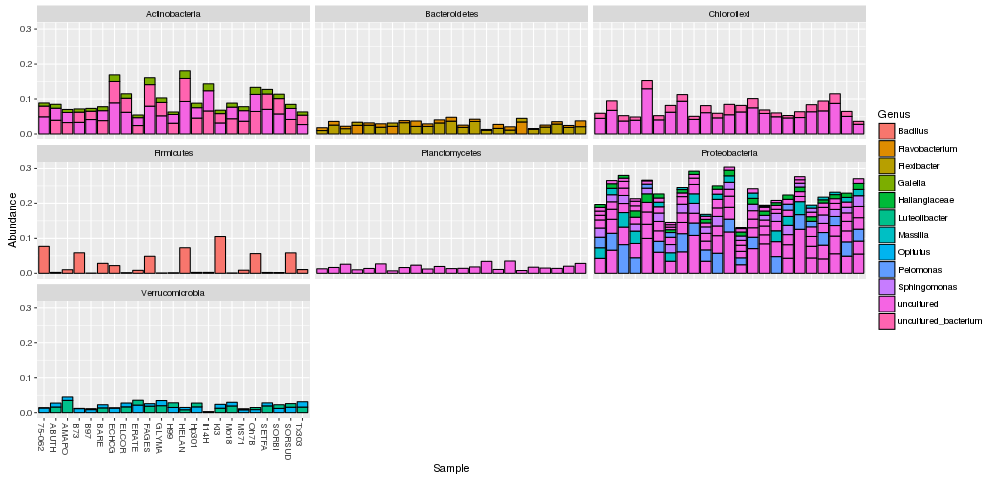

In [103]:
%%R -w 1000
#subset to top 20 OTUs
TopOTUs = names(sort(taxa_sums(m.Gen), TRUE)[1:20])
    Top = prune_taxa(TopOTUs, m.Gen)
p1 = plot_bar(Top,  fill="Genus") +
    facet_wrap(~Phylum)

#pdf("firmicutes_relabund.pdf")
p1
#dev.off()

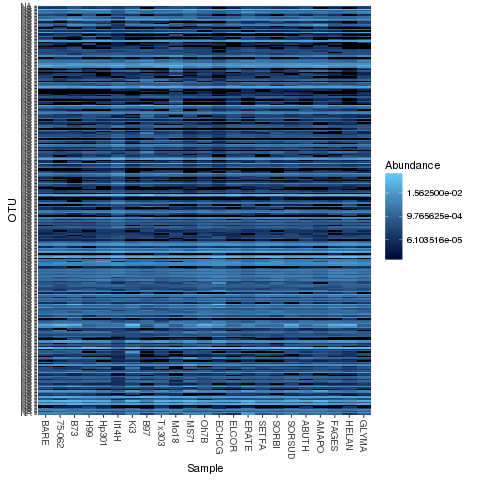

In [104]:
%%R
SO = c("BARE", "75-062", "B73", "H99" , "Hp301",  "Il14H",  "Ki3",  "B97" , "Tx303",  
                        "Mo18",   "MS71" ,  "Oh7B",  "ECHCG",  "ELCOR", "ERATE" , "SETFA",  "SORBI",  "SORSUD", 
                   "ABUTH", "AMAPO", "FAGES", "HELAN" ,  "GLYMA")
plot_heatmap(m.Fam, taxa.label = "Genus", sample.order = SO)

# without merge

In [105]:
%%R
M = merge_samples(physeq.Full, "Plant")
M

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [108]:
%%R
#transform to sample count to rel abund
M = transform_sample_counts(M, function(x) x / sum(x))
sample_sums(M)

75-062  ABUTH  AMAPO    B73    B97   BARE  ECHCG  ELCOR  ERATE  FAGES  GLYMA 
     1      1      1      1      1      1      1      1      1      1      1 
   H99  HELAN  Hp301  Il14H    Ki3   Mo18   MS71   Oh7B  SETFA  SORBI SORSUD 
     1      1      1      1      1      1      1      1      1      1      1 
 Tx303 
     1 


# merge at phylum level

In [153]:
%%R
Phy = tax_glom(physeq.Full, taxrank="Phylum")
Phy = M = merge_samples(Phy, "PlantSample")

In [154]:
%%R
Phy.rel = transform_sample_counts(Phy, function(x) x / sum(x))

In [170]:
%%R
sample_data(Phy.rel)$Planted = ifelse(sample_data(Phy.rel)$Type == 1, "Bare", "Rhizosphere")

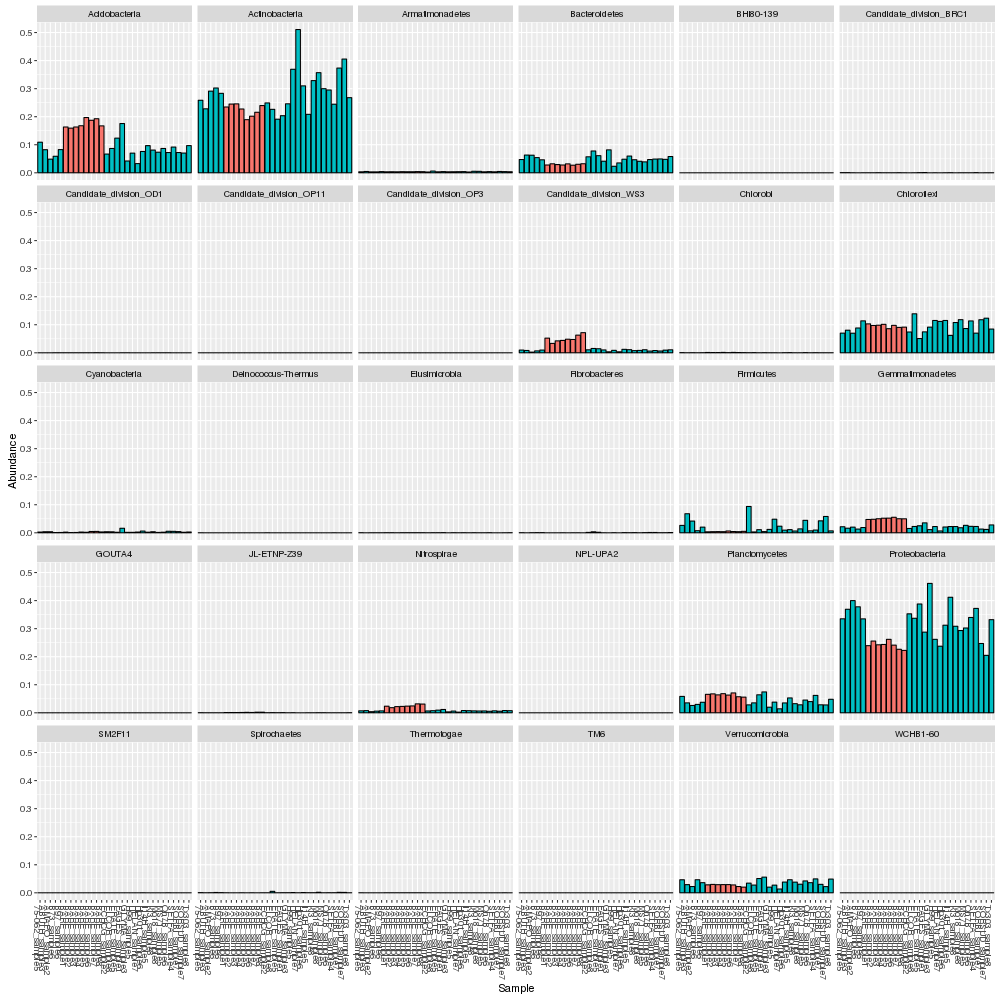

In [172]:
%%R -w 1000 -h 1000
#subset to top 20 OTUs


p1 = plot_bar(Phy.rel, fill = "Planted") + 
    facet_wrap(~Phylum) +
    theme(legend.position="none")

#pdf("firmicutes_relabund.pdf")
p1
#dev.off()

# Merge at the Class level

In [173]:
%%R
Phy = tax_glom(physeq.Full, taxrank="Class")
Phy = M = merge_samples(Phy, "PlantSample")
Phy.rel = transform_sample_counts(Phy, function(x) x / sum(x))
sample_data(Phy.rel)$Planted = ifelse(sample_data(Phy.rel)$Type == 1, "Bare", "Rhizosphere")

In [176]:
%%R
Phy.thresh =  filter_taxa(Phy.rel, 
                                function(x) sum(x > 0.005) > 0, TRUE)
Phy.thresh

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 45 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 45 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 45 tips and 44 internal nodes ]


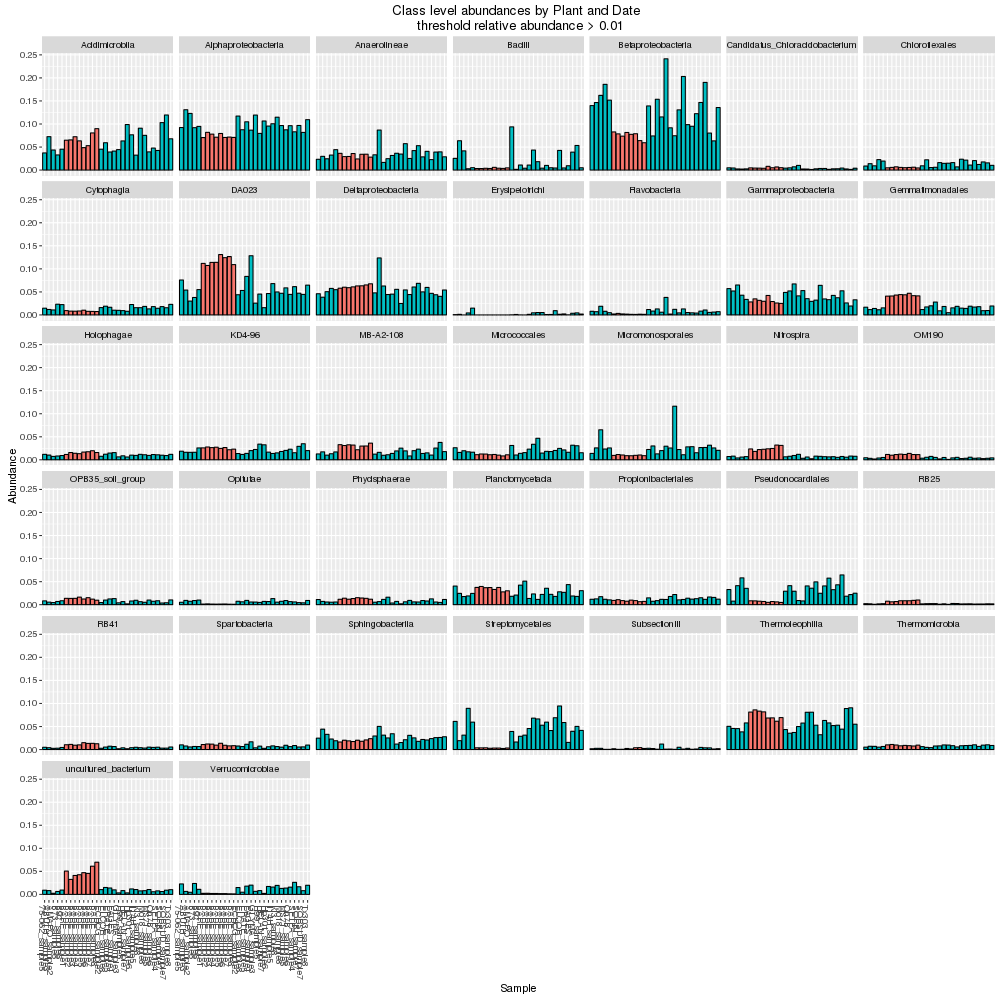

In [183]:
%%R -w 1000 -h 1000

Phy.thresh =  filter_taxa(Phy.rel, 
                                function(x) sum(x > 0.01) > 0, TRUE)
p1 = plot_bar(Phy.thresh, fill="Planted") + 
    facet_wrap(~Class) +
    theme(legend.position="none")+
    ggtitle("Class level abundances by Plant and Date \n threshold relative abundance > 0.01")

#pdf("firmicutes_relabund.pdf")
p1
#dev.off()

# Merge at the order level

In [184]:
%%R
Phy = tax_glom(physeq.Full, taxrank="Order")
Phy = M = merge_samples(Phy, "PlantSample")
Phy.rel = transform_sample_counts(Phy, function(x) x / sum(x))
sample_data(Phy.rel)$Planted = ifelse(sample_data(Phy.rel)$Type == 1, "Bare", "Rhizosphere")

In [185]:
%%R
Phy.thresh =  filter_taxa(Phy.rel, 
                                function(x) sum(x > 0.005) > 0, TRUE)
Phy.thresh

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 61 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 61 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 61 tips and 60 internal nodes ]


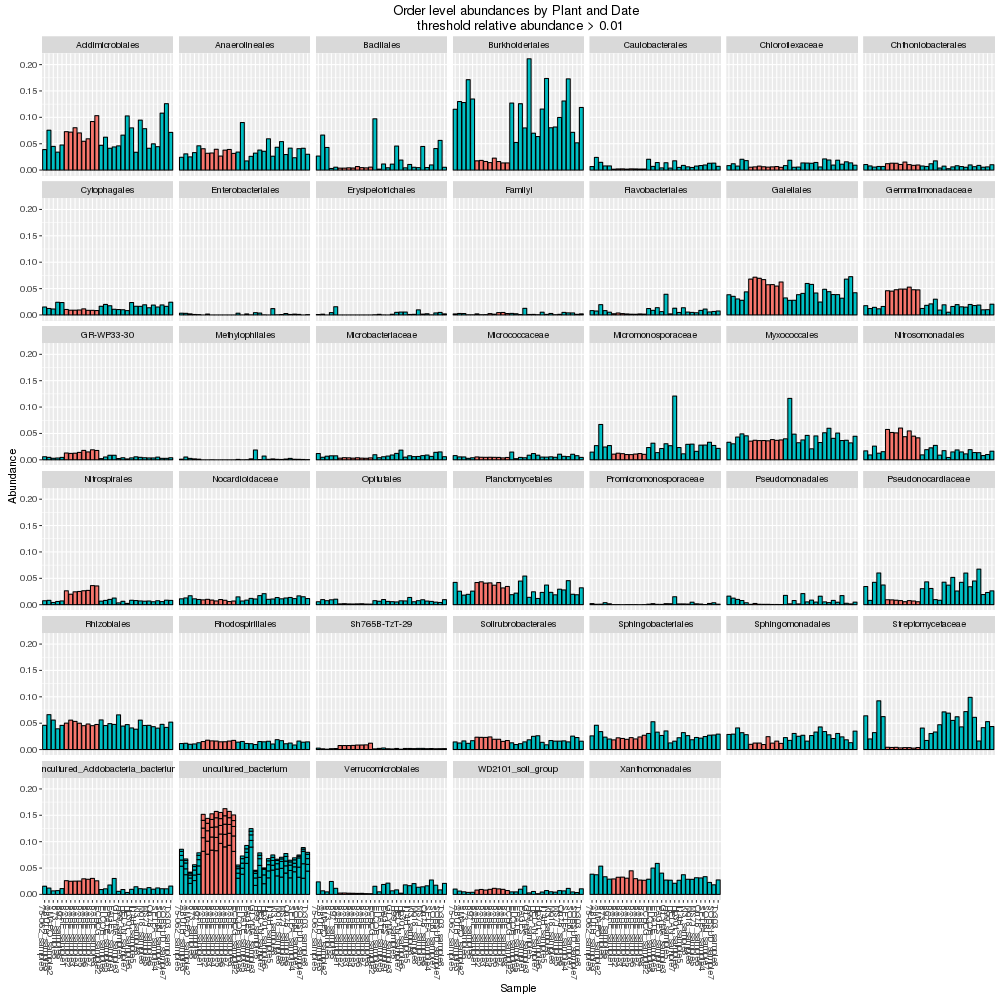

In [188]:
%%R -w 1000 -h 1000

Phy.thresh =  filter_taxa(Phy.rel, 
                                function(x) sum(x > 0.01) > 0, TRUE)
p1 = plot_bar(Phy.thresh, fill="Planted") + 
    facet_wrap(~Order) +
    theme(legend.position="none")+
    ggtitle("Order level abundances by Plant and Date \n threshold relative abundance > 0.01")

#pdf("firmicutes_relabund.pdf")
p1
#dev.off()

# Merge at the family level

In [189]:
%%R
Phy = tax_glom(physeq.Full, taxrank="Family")
Phy = M = merge_samples(Phy, "PlantSample")
Phy.rel = transform_sample_counts(Phy, function(x) x / sum(x))
sample_data(Phy.rel)$Planted = ifelse(sample_data(Phy.rel)$Type == 1, "Bare", "Rhizosphere")

In [190]:
%%R
Phy.thresh =  filter_taxa(Phy.rel, 
                                function(x) sum(x > 0.005) > 0, TRUE)
Phy.thresh

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 85 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 85 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 85 tips and 84 internal nodes ]


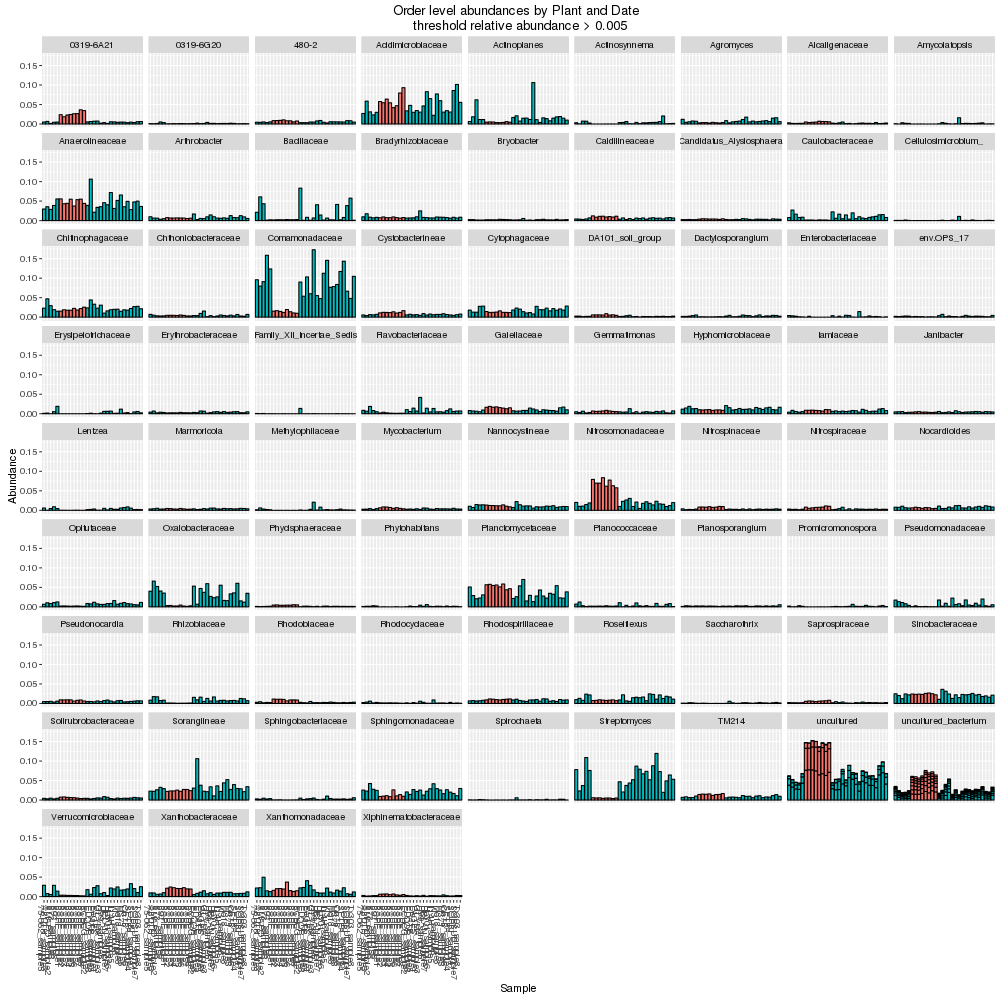

In [191]:
%%R -w 1000 -h 1000

p1 = plot_bar(Phy.thresh, fill="Planted") + 
    facet_wrap(~Family) +
    theme(legend.position="none")+
    ggtitle("Order level abundances by Plant and Date \n threshold relative abundance > 0.005")

#pdf("firmicutes_relabund.pdf")
p1
#dev.off()

# Merge at the genus level

In [192]:
%%R
Phy = tax_glom(physeq.Full, taxrank="Genus")
Phy = M = merge_samples(Phy, "PlantSample")
Phy.rel = transform_sample_counts(Phy, function(x) x / sum(x))
sample_data(Phy.rel)$Planted = ifelse(sample_data(Phy.rel)$Type == 1, "Bare", "Rhizosphere")

In [193]:
%%R
Phy.thresh =  filter_taxa(Phy.rel, 
                                function(x) sum(x > 0.005) > 0, TRUE)
Phy.thresh

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 103 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 103 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 103 tips and 102 internal nodes ]


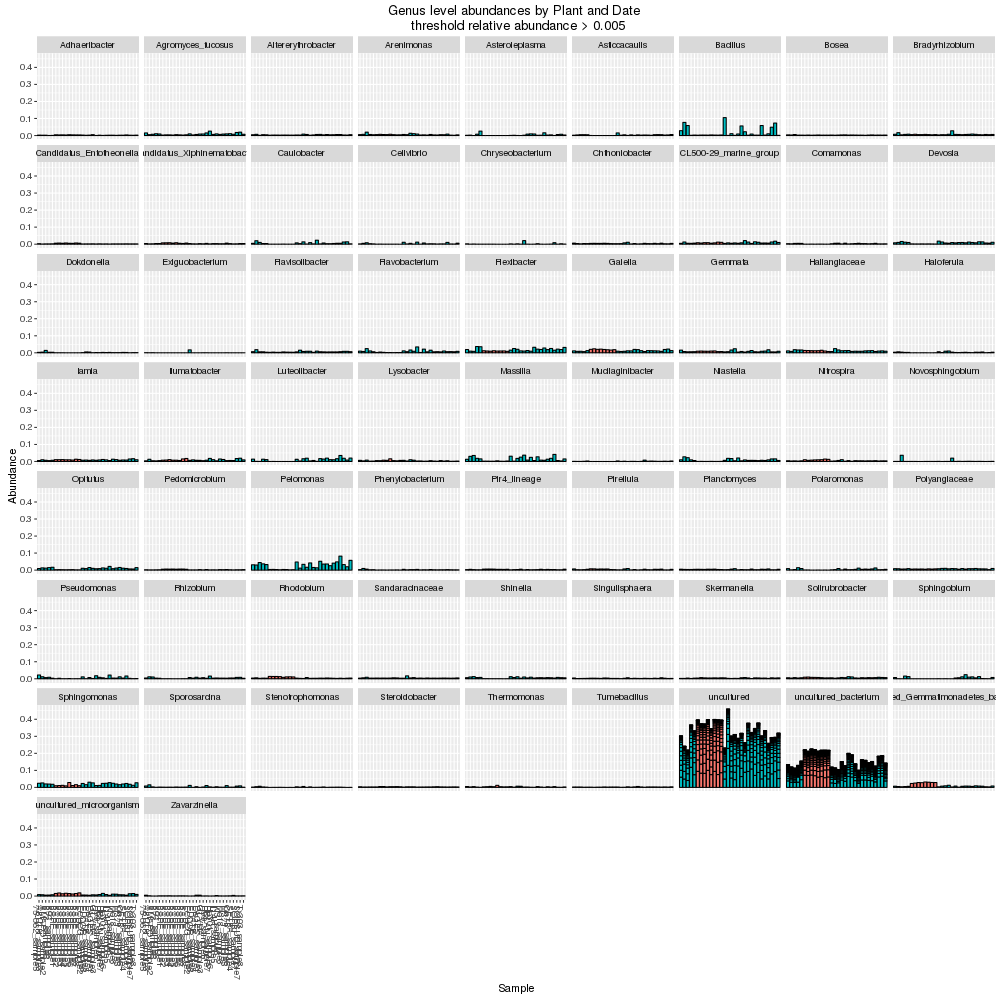

In [194]:
%%R -w 1000 -h 1000

p1 = plot_bar(Phy.thresh, fill="Planted") + 
    facet_wrap(~Genus) +
    theme(legend.position="none")+
    ggtitle("Genus level abundances by Plant and Date \n threshold relative abundance > 0.005")

#pdf("firmicutes_relabund.pdf")
p1
#dev.off()

# Explore OTU relative abundance

In [17]:
%%R -i workDir

pdf("sample_rel-abundance.pdf", onefile = TRUE)

N = nsamples(physeq.snorm)

s.df = sample_data(physeq.snorm)
s.df.o =  s.df[with(s.df, order(Plant, Treatment))]
samples = sample_names(s.df.o)

for(i in 1:N){
    samplename = samples[i]
    sample = subset_samples(physeq.snorm, X.sample == samplename)
  

    TopOTUs = names(sort(taxa_sums(sample), TRUE)[1:50])
    Top = prune_taxa(TopOTUs, sample)
    title = paste(sample_data(Top)$Plant, samplename, sample_sums(Top), sep = " ")
    plot =  barplot(sort(taxa_sums(Top), TRUE), las=2, 
        main = title)
    plot
}

dev.off()



png 
  2 
